## Logistic Regression

Logistic Regression is usually used when data are categorical.
First we import all the necessary libs.

In [1]:
# import everything we need first
import pandas as pd
import matplotlib.pyplot as plt

We are going to import data from `Logistic_Reg_Infected.csv`
For better understanding, we can see the independent variable (x) as the age of children, and the dependent variable (y) as whether the child is infected by some disease.

0 means not infected
1 means infected
As the dependent variable only has two possible values, 0 or 1, we can use a binary logistic model to predict.

In [51]:
# read in data from the file
df = pd.read_csv('Logistic_Reg_Infected.csv')
df.head() # show the first five values

,age,sleep,infected
0,1.2,5.0,0
1,2.0,5.6,0
2,2.2,6.5,0
3,12.1,10.3,1
4,6.3,5.3,0


In [52]:
df.tail() # show the last five values

,age,sleep,infected
14,4.0,9.0,0
15,12.3,8.0,1
16,13.0,11.0,0
17,14.0,9.7,1
18,18.5,8.5,1


In [53]:
df.describe()

,age,sleep,infected
count,19.000000,19.000000,19.000000
mean,8.803158,8.326316,0.473684
std,4.474119,1.830253,0.512989
min,1.200000,5.000000,0.000000
25%,6.480000,7.000000,0.000000
50%,9.000000,8.800000,0.000000
75%,12.050000,9.750000,1.000000
max,18.500000,11.000000,1.000000


# Visualize the data

In [54]:
# Remember the filtering
df_0 = df[df['infected'] == 0] # filter all column 'infected' is 0
df_1 = df[df['infected'] == 1]

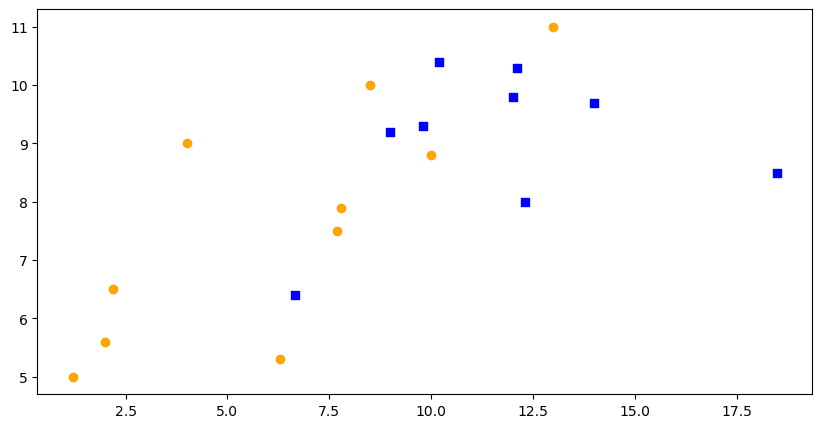

In [55]:
# in this plot, data points above the line are categorized as 1, those below the line are categorized as 0
# this line is our regression model's decision boundary
# This line creates a new figure and a set of subplots. The figsize=(10,5) argument sets the size of the figure to be 10 units wide and 5 units tall.
# fig is the Figure object, and ax is the AxesSubplot object where the data will be plotted.

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_0['age'], df_0['sleep'], c= 'orange') # class = 0 circle points 
ax.scatter(df_1['age'], df_1['sleep'], marker = 's', c='blue') # class = 1 square points
# x_min, x_max = ax.get_xlim()

## Model training

We are going to use the same technic to build a Logistic Regression model.


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logReg = LogisticRegression()
x = df[['age', 'sleep']]
y = df['infected']    # Classification : infected = 0 or 1



In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.head()

,age,sleep
8,8.5,10.0
16,13.0,11.0
3,12.1,10.3
13,12.0,9.8
15,12.3,8.0


In [58]:
print(y_test)

0     0
5     1
11    1
1     0
Name: infected, dtype: int64


In [59]:
print(x_train.shape)

(15, 2)


In [60]:
print(x_test)

      age  sleep
0    1.20    5.0
5    6.66    6.4
11  10.20   10.4
1    2.00    5.6


In [61]:
logReg.fit(x_train, y_train)

LogisticRegression()

# Evaluate Model with Accuracy Score

We can use our model to predict values.

In [62]:
from sklearn.metrics import accuracy_score

y_pred = logReg.predict(x_test)
print('Y_Pred:',y_pred)

Y_Pred: [0 0 0 0]


In [63]:
print(y_test)
accuracy_score(y_test, y_pred)

0     0
5     1
11    1
1     0
Name: infected, dtype: int64


0.5

In [78]:
from sklearn.metrics import confusion_matrix

# Let's say these are your true and predicted labels
y_test = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0] # actual labels reserved for test
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0] # predicted values

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4 1]
 [1 4]]


In [65]:
logReg.predict(x_test)  # prediction value of x_test

array([0, 0, 0, 0], dtype=int64)

# Predict 
Predict with some values

In [79]:
# predict y when x1 = 7.5 and x2 = 0.65
logReg.predict([[7.5,0.65]])  

c:\Users\lctan\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [80]:
# predict y when x1 = 10 and x2 = 0.74
print(logReg.predict([[18, 6.74]]))

[1]


c:\Users\lctan\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
